In [ ]:
!pip install ucimlrepo
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

from ucimlrepo import fetch_ucirepo


vertebral_column = fetch_ucirepo(id=212)
type(vertebral_column)
X = vertebral_column.data.features
y = vertebral_column.data.targets
type(X)
type(y)

# Step 1: Split the Data
X = data.drop('target', axis=1)  # Assuming 'target' is your target variable
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Scale the Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Train a Baseline Model (Logistic Regression)
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

# Step 4: Evaluate the Logistic Regression Model
y_pred = log_reg.predict(X_test_scaled)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred))

# Step 5: Train a Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Step 6: Evaluate the Random Forest Classifier
y_pred_rf = rf_clf.predict(X_test)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Optional: Plotting ROC Curve for Random Forest
y_prob_rf = rf_clf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob_rf)
plt.plot(fpr, tpr, label='Random Forest (AUC = {:.2f})'.format(roc_auc_score(y_test, y_prob_rf)))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


NameError: name 'data' is not defined

In [ ]:
!pip install ucimlrepo
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

from ucimlrepo import fetch_ucirepo

# Fetch the dataset from UCI repository
vertebral_column = fetch_ucirepo(id=212)

# Extract features and target from the fetched dataset
X = vertebral_column.data.features
y = vertebral_column.data.targets

# Step 1: Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Scale the Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Train a Baseline Model (Logistic Regression)
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

# Step 4: Evaluate the Logistic Regression Model
y_pred = log_reg.predict(X_test_scaled)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred))

# Step 5: Train a Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Step 6: Evaluate the Random Forest Classifier
y_pred_rf = rf_clf.predict(X_test)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Optional: Plotting ROC Curve for Random Forest
y_prob_rf = rf_clf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob_rf)
plt.plot(fpr, tpr, label='Random Forest (AUC = {:.2f})'.format(roc_auc_score(y_test, y_prob_rf)))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Logistic Regression Classification Report:
                   precision    recall  f1-score   support

           Hernia       0.67      0.67      0.67        12
           Normal       0.76      0.72      0.74        18
Spondylolisthesis       0.97      1.00      0.98        32

         accuracy                           0.85        62
        macro avg       0.80      0.80      0.80        62
     weighted avg       0.85      0.85      0.85        62

Random Forest Classification Report:
                   precision    recall  f1-score   support

           Hernia       0.50      0.50      0.50        12
           Normal       0.71      0.67      0.69        18
Spondylolisthesis       0.97      1.00      0.98        32

         accuracy                           0.81        62
        macro avg       0.73      0.72      0.72        62
     weighted avg       0.80      0.81      0.80        62



ValueError: multiclass format is not supported

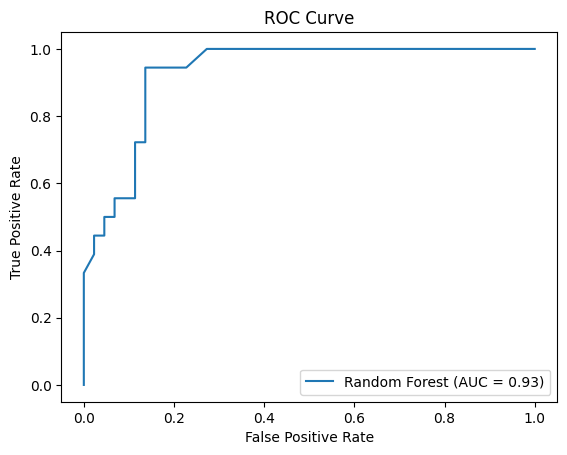

In [ ]:
# Optional: Plotting ROC Curve for Random Forest
# Assuming 'Normal' is the positive class for demonstration
y_test_binary = (y_test['class'] == 'Normal').astype(int)  # Convert to binary
y_prob_rf = rf_clf.predict_proba(X_test)[:, 1]  # Probability of the positive class
fpr, tpr, _ = roc_curve(y_test_binary, y_prob_rf)
plt.plot(fpr, tpr, label='Random Forest (AUC = {:.2f})'.format(roc_auc_score(y_test_binary, y_prob_rf)))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [ ]:
# prompt: Would like to use optimisation using XGboost, LightGBM and k fold clustering to improve the AUC

!pip install xgboost lightgbm

import pandas as pd
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import xgboost as xgb
import lightgbm as lgb

# ... (Your existing code for data loading and preprocessing) ...

# Assuming 'data' is your DataFrame and 'target' is your target variable
X = data.drop('target', axis=1)
y = data['target']

# Convert target to numeric if necessary
y = y.astype('category').cat.codes

# Step 7: K-Fold Cross Validation and Model Training (XGBoost and LightGBM)
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

xgb_auc_scores = []
lgb_auc_scores = []

for train_index, test_index in kf.split(X):
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]

  scaler = StandardScaler()
  X_train_scaled = scaler.fit_transform(X_train)
  X_test_scaled = scaler.transform(X_test)

  # XGBoost
  xgb_clf = xgb.XGBClassifier(objective='binary:logistic', eval_metric='auc', random_state=42)
  xgb_clf.fit(X_train_scaled, y_train)
  y_prob_xgb = xgb_clf.predict_proba(X_test_scaled)[:, 1]
  xgb_auc_scores.append(roc_auc_score(y_test, y_prob_xgb))

  # LightGBM
  lgb_clf = lgb.LGBMClassifier(objective='binary', metric='auc', random_state=42)
  lgb_clf.fit(X_train_scaled, y_train)
  y_prob_lgb = lgb_clf.predict_proba(X_test_scaled)[:, 1]
  lgb_auc_scores.append(roc_auc_score(y_test, y_prob_lgb))

# Print average AUC scores
print(f"Average XGBoost AUC: {sum(xgb_auc_scores) / len(xgb_auc_scores)}")
print(f"Average LightGBM AUC: {sum(lgb_auc_scores) / len(lgb_auc_scores)}")

#Plot ROC curve (Example with XGBoost)
fpr, tpr, _ = roc_curve(y_test, y_prob_xgb) #replace y_prob_xgb with prediction from other models
plt.plot(fpr, tpr, label=f'XGBoost (AUC = {roc_auc_score(y_test, y_prob_xgb):.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


NameError: name 'data' is not defined

In [ ]:
!pip install ucimlrepo xgboost lightgbm
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import xgboost as xgb
import lightgbm as lgb
from ucimlrepo import fetch_ucirepo

# Fetch the dataset from UCI repository
vertebral_column = fetch_ucirepo(id=212)

# Extract features and target from the fetched dataset
X = vertebral_column.data.features
y = vertebral_column.data.targets

# Convert target to numeric if necessary
# Assuming 'class' is the target column name
y = pd.factorize(y['class'])[0]

# Step 7: K-Fold Cross Validation and Model Training (XGBoost and LightGBM)
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

xgb_auc_scores = []
lgb_auc_scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # XGBoost
    xgb_clf = xgb.XGBClassifier(objective='binary:logistic', eval_metric='auc', random_state=42)
    xgb_clf.fit(X_train_scaled, y_train)
    y_prob_xgb = xgb_clf.predict_proba(X_test_scaled)[:, 1]
    xgb_auc_scores.append(roc_auc_score(y_test, y_prob_xgb))

    # LightGBM
    lgb_clf = lgb.LGBMClassifier(objective='binary', metric='auc', random_state=42)
    lgb_clf.fit(X_train_scaled, y_train)
    y_prob_lgb = lgb_clf.predict_proba(X_test_scaled)[:, 1]
    lgb_auc_scores.append(roc_auc_score(y_test, y_prob_lgb))

# Print average AUC scores
print(f"Average XGBoost AUC: {sum(xgb_auc_scores) / len(xgb_auc_scores)}")
print(f"Average LightGBM AUC: {sum(lgb_auc_scores) / len(lgb_auc_scores)}")

# Plot ROC curve (Example with XGBoost)
fpr, tpr, _ = roc_curve(y_test, y_prob_xgb)  # replace y_prob_xgb with prediction from other models
plt.plot(fpr, tpr, label=f'XGBoost (AUC = {roc_auc_score(y_test, y_prob_xgb):.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

ValueError: multi_class must be in ('ovo', 'ovr')

In [ ]:
!pip install ucimlrepo xgboost lightgbm
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import xgboost as xgb
import lightgbm as lgb
from ucimlrepo import fetch_ucirepo

# Fetch the dataset from UCI repository
vertebral_column = fetch_ucirepo(id=212)

# Extract features and target from the fetched dataset
X = vertebral_column.data.features
# Assuming 'Normal' is the positive class and Abnormal as the negative class
y = (vertebral_column.data.targets['class'] == 'Normal').astype(int) # Convert to binary 0 and 1

# Step 7: K-Fold Cross Validation and Model Training (XGBoost and LightGBM)
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

xgb_auc_scores = []
lgb_auc_scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # XGBoost
    xgb_clf = xgb.XGBClassifier(objective='binary:logistic', eval_metric='auc', random_state=42)
    xgb_clf.fit(X_train_scaled, y_train)
    y_prob_xgb = xgb_clf.predict_proba(X_test_scaled)[:, 1]
    xgb_auc_scores.append(roc_auc_score(y_test, y_prob_xgb))

    # LightGBM
    lgb_clf = lgb.LGBMClassifier(objective='binary', metric='auc', random_state=42)
    lgb_clf.fit(X_train_scaled, y_train)
    y_prob_lgb = lgb_clf.predict_proba(X_test_scaled)[:, 1]
    lgb_auc_scores.append(roc_auc_score(y_test, y_prob_lgb))

# Print average AUC scores
print(f"Average XGBoost AUC: {sum(xgb_auc_scores) / len(xgb_auc_scores)}")
print(f"Average LightGBM AUC: {sum(lgb_auc_scores) / len(lgb_auc_scores)}")

# Plot ROC curve (Example with XGBoost)
fpr, tpr, _ = roc_curve(y_test, y_prob_xgb)  # replace y_prob_xgb with prediction from other models
plt.plot(fpr, tpr, label=f'XGBoost (AUC = {roc_auc_score(y_test, y

SyntaxError: unterminated string literal (detected at line 52) (<ipython-input-3-c32386488cc9>, line 52)

[LightGBM] [Info] Number of positive: 82, number of negative: 166
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000339 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 500
[LightGBM] [Info] Number of data points in the train set: 248, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.330645 -> initscore=-0.705269
[LightGBM] [Info] Start training from score -0.705269
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

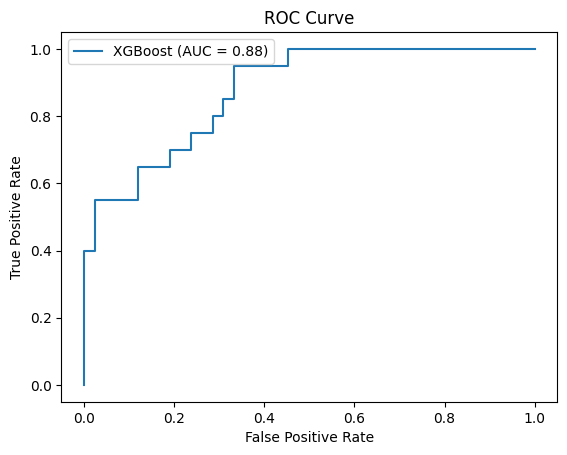

In [ ]:
!pip install ucimlrepo xgboost lightgbm
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import xgboost as xgb
import lightgbm as lgb
from ucimlrepo import fetch_ucirepo

# Fetch the dataset from UCI repository
vertebral_column = fetch_ucirepo(id=212)

# Extract features and target from the fetched dataset
X = vertebral_column.data.features
# Assuming 'Normal' is the positive class and Abnormal as the negative class
y = (vertebral_column.data.targets['class'] == 'Normal').astype(int) # Convert to binary 0 and 1

# Step 7: K-Fold Cross Validation and Model Training (XGBoost and LightGBM)
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

xgb_auc_scores = []
lgb_auc_scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # XGBoost
    xgb_clf = xgb.XGBClassifier(objective='binary:logistic', eval_metric='auc', random_state=42)
    xgb_clf.fit(X_train_scaled, y_train)
    y_prob_xgb = xgb_clf.predict_proba(X_test_scaled)[:, 1]
    xgb_auc_scores.append(roc_auc_score(y_test, y_prob_xgb))

    # LightGBM
    lgb_clf = lgb.LGBMClassifier(objective='binary', metric='auc', random_state=42)
    lgb_clf.fit(X_train_scaled, y_train)
    y_prob_lgb = lgb_clf.predict_proba(X_test_scaled)[:, 1]
    lgb_auc_scores.append(roc_auc_score(y_test, y_prob_lgb))

# Print average AUC scores
print(f"Average XGBoost AUC: {sum(xgb_auc_scores) / len(xgb_auc_scores)}")
print(f"Average LightGBM AUC: {sum(lgb_auc_scores) / len(lgb_auc_scores)}")

# Plot ROC curve (Example with XGBoost)
fpr, tpr, _ = roc_curve(y_test, y_prob_xgb)  # replace y_prob_xgb with prediction from other models
plt.plot(fpr, tpr, label=f'XGBoost (AUC = {roc_auc_score(y_test, y_prob_xgb):.2f})') # Corrected line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()